In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pickle


file_user_id = open('feedback_user_id.pkl', 'r')
user_id = pickle.load(file_user_id)
file_user_id.close()

n_user= len(user_id)

file_users = open('feedback_dataset.pkl', 'r')
users = pickle.load(file_users)
file_users.close()

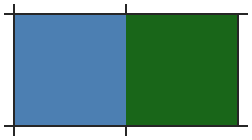

In [42]:
#some config stuff
import seaborn as sns

def draw_single_points(x, y, c, axs):
    axs.plot(x[-1],y[-1],color=c,marker='.', markersize='3', alpha = 0.7)

def makecross(x,y, axs):
    l=0.25
    axs.plot([x-l,x+l],[y,y],color="k",linewidth=1)
    axs.plot([x,x],[y-l,y+l],color="k",linewidth=1)

def setstyle(stylename):
    sns.set()
    sns.set_style(stylename, {"font.family": "serif"})
    sns.set_context("paper",font_scale=0.5)
    sns.set_palette(mode_colors)
# Here you do the actual plot

mode_colors=[(0.3,0.5,0.7),(0.1,0.4,0.1)]
sns.palplot(mode_colors)
setstyle("white")
colormap={"without_feedback":mode_colors[0],"with_feedback":mode_colors[1]}



sns.set_context("paper", rc={"font.size":10,"axes.titlesize":5,"axes.labelsize":5})

def savefig(fig,fn,width_inches,height_inches):
    fig.set_size_inches(width_inches, height_inches)
    try:
        plt.tight_layout()
    except:
        pass
    fig.savefig("{}.png".format(fn),dpi=640)
    fig.savefig("{}.pdf".format(fn))
    fig.savefig("{}.svg".format(fn))
    return fig
    
IEEE_2COL = 7.16 # IEEE \textwidth in inches
IEEE_1COL = 3.5 # IEEE \columnwidth in inches


targets = [{'x':2, 'y':-1},{'x':2, 'y':0}, {'x':2, 'y':1}]
t = [np.array([2, -1]), np.array([2, 0]), np.array([2, 1])]
x_axis = np.array(np.arange(0, 5, 5.0/250.0))
best_run = {'1':0, '2':2, '4':0, '5':0, '17':2, '6':0, '8':0, '10':0, '12':0, '13':2, '14':2, '16':2 }
#user 4 bad
#user 6 bad

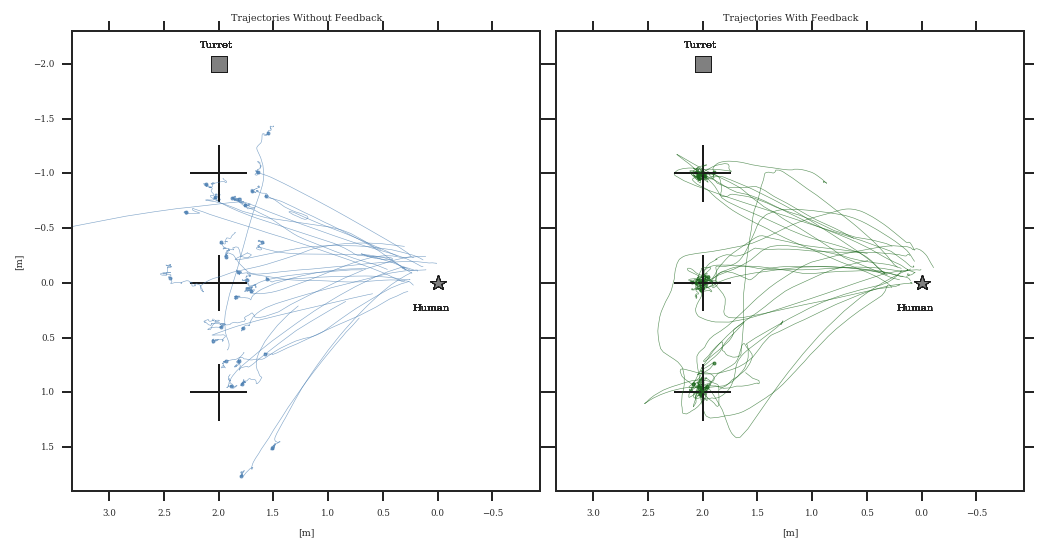

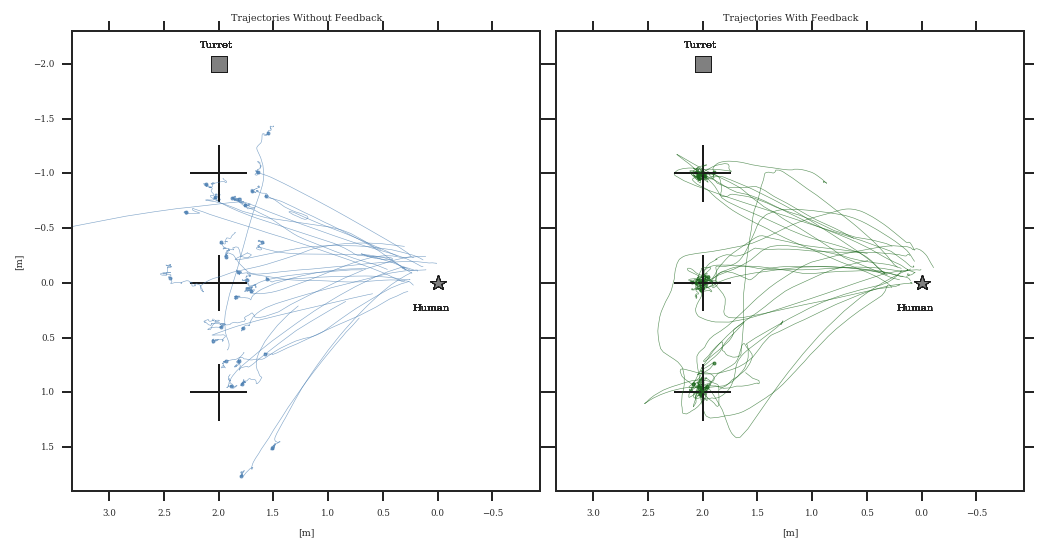

In [43]:
#draw trajectory comparison
setstyle("white")
fig,axs=plt.subplots(ncols= 2, figsize=(10,30), sharey=True, sharex=True)
def draw_session_separated(user, colormap, axs, nsessions=-1, best_index=0):
    for session in user[3*best_index:3*best_index+nsessions]:
        c = colormap["without_feedback"]
        x, y, z = zip(session['p_moving_no_fdb'])
        axs[0].plot(x[0],y[0],color=c,linewidth=0.3,alpha=0.7)
        draw_single_points(x[0], y[0], c, axs[0])
        x, y, z = zip(session['p_pointing_no_fdb']) 
        axs[0].plot(x[0],y[0],color=c,linewidth=0.3,alpha=0.7)
        
        c = colormap["with_feedback"]
        x, y, z = zip(session['p_moving_fdb'])  
        axs[1].plot(x[0],y[0],color=c,linewidth=0.3,alpha=0.7)
        draw_single_points(x[0], y[0], c, axs[1])

        x, y, z = zip(session['p_pointing_fdb'])            
        axs[1].plot(x[0],y[0],color=c,linewidth=0.3,alpha=0.7)


distances_no_fdb = []
distances_fdb = []


def draw_all_user(n):
    for i in range(0, n):
        for j in range(0, 2):
            axs[j].plot(0,0,color="gray",marker="*",markersize=8)
            axs[j].annotate("Human", (0.23, 0.25), size=5)
            axs[j].plot(2,-2 ,color="gray",marker="s",markersize=8)
            axs[j].annotate("Turret", (2.17, -2.15),size=5)
            axs[j].set_aspect("equal")
            axs[j].set_xlim(-0.1, 2.5)
            axs[j].set_ylim(-2.3, 1.9)
            axs[j].set_xlabel("[m]")
            if j==0:
                axs[j].set_ylabel("[m]")
                axs[j].set_title("Trajectories Without Feedback")
            else:
                axs[j].set_title("Trajectories With Feedback")
            axs[j].invert_xaxis()
            axs[j].invert_yaxis()
            for target in targets:
                makecross(target["x"],target["y"], axs[j])
        best_index = best_run[user_id[i]]
        draw_session_separated(axs=axs, colormap=colormap, user=users[i], nsessions=3, best_index = best_index)


draw_all_user(n_user)



savefig(fig, "res_out/trajectories", height_inches=IEEE_2COL/2+0.2, width_inches=IEEE_2COL)

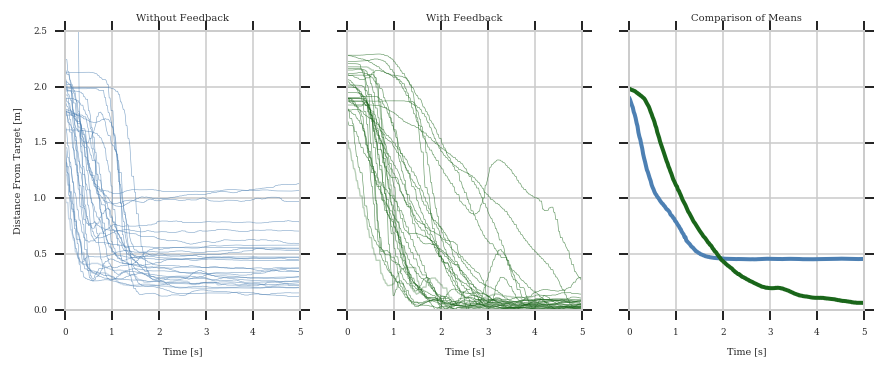

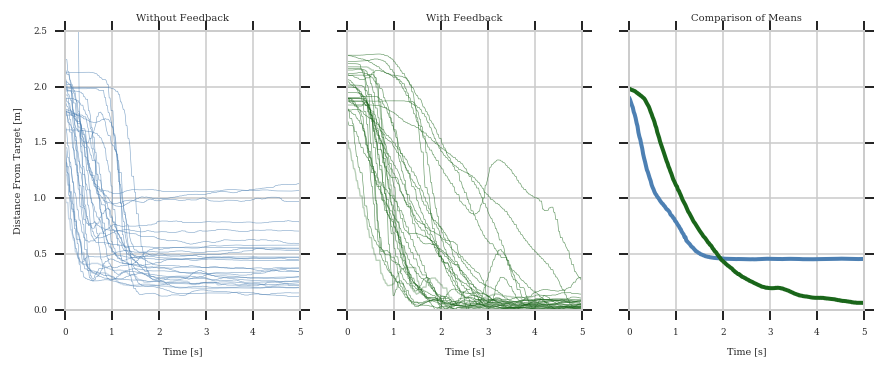

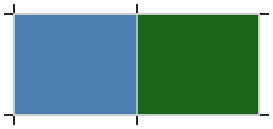

In [44]:
#Plot distance over time with/without feedback and mean
setstyle("whitegrid")
fig,axs=plt.subplots(ncols= 3, figsize=(10,30), sharey=True, sharex=True)
mode_colors=[(0.3,0.5,0.7),(0.1,0.4,0.1)]
sns.palplot(mode_colors)
colormap={"without_feedback":mode_colors[0],"with_feedback":mode_colors[1]}



sns.set_context("paper", rc={"font.size":10,"axes.titlesize":5,"axes.labelsize":5})

def savefig(fig,fn,width_inches,height_inches):
    fig.set_size_inches(width_inches, height_inches)
    try:
        plt.tight_layout()
    except:
        pass
    fig.savefig("{}.png".format(fn),dpi=800)
    fig.savefig("{}.pdf".format(fn))
    fig.savefig("{}.svg".format(fn))
    return fig
    
IEEE_2COL = 7.16 # IEEE \textwidth in inches
IEEE_1COL = 3.5 # IEEE \columnwidth in inches
targets = [{'x':2, 'y':-1},{'x':2, 'y':0}, {'x':2, 'y':1}]
t = [np.array([2, -1]), np.array([2, 0]), np.array([2, 1])]
x_axis = np.array(np.arange(0, 5, 5.0/250.0))
best_run = {'1':0, '2':2, '4':0, '5':0, '17':2, '6':0, '8':0, '10':0, '12':0, '13':2, '14':2, '16':2 }
#user 4 bad
#user 6 bad


def draw_session_separated(user, colormap, axs, nsessions=-1, best_index=0):
    for session in user[3*best_index:3*best_index+nsessions]:
        c = colormap["without_feedback"]
        x, y, z = zip(session['p_moving_no_fdb'])
        axs[0].plot(x[0],y[0],color=c,linewidth=0.3,alpha=0.7)
        draw_single_points(x[0], y[0], c, axs[0])
        x, y, z = zip(session['p_pointing_no_fdb']) 
        axs[0].plot(x[0],y[0],color=c,linewidth=0.3,alpha=0.7)
        
        c = colormap["with_feedback"]
        x, y, z = zip(session['p_moving_fdb'])  
        axs[1].plot(x[0],y[0],color=c,linewidth=0.3,alpha=0.7)
        draw_single_points(x[0], y[0], c, axs[1])

        x, y, z = zip(session['p_pointing_fdb'])            
        axs[1].plot(x[0],y[0],color=c,linewidth=0.3,alpha=0.7)


distances_no_fdb = []
distances_fdb = []


def draw_all_user(n):
    for i in range(0, n):
        best_index = best_run[user_id[i]]
        if user_id[i] != '17':
            for idx, target in enumerate(t):
                x, y, z = zip(users[i][idx+3*best_index]['p_moving_no_fdb'])
                p =np.column_stack((x[0], y[0]))
                dist = np.linalg.norm(target-p, axis=1)
                distances_no_fdb.append(dist[0:250])
                c = colormap["without_feedback"]
                axs[0].plot(x_axis, dist[0:250], color=c,linewidth=0.3,alpha=0.7)
                x, y, z = zip(users[i][idx]['p_moving_fdb'])
                p =np.column_stack((x[0], y[0]))
                dist = np.linalg.norm(target-p, axis=1)
                distances_fdb.append(dist[0:250])
                c = colormap["with_feedback"]
                axs[1].plot(x_axis, dist[0:250], color=c,linewidth=0.3,alpha=0.7)
            #mean_no_fdb = (distances_no_fdb[0] + distances_no_fdb[1] + distances_no_fdb[2])/3.0
            #mean_fdb = (distances_fdb[0] + distances_fdb[1] + distances_fdb[2])/3.0
        else:
            for idx, target in enumerate(t[1:]):
                x, y, z = zip(users[i][idx+3*best_index]['p_moving_no_fdb'])
                p =np.column_stack((x[0], y[0]))
                dist = np.linalg.norm(target-p, axis=1)
                distances_no_fdb.append(dist[0:250])
                c = colormap["without_feedback"]
                axs[0].plot(x_axis, dist[0:250], color=c,linewidth=0.7,alpha=0.3)
                x, y, z = zip(users[i][idx]['p_moving_fdb'])
                p =np.column_stack((x[0], y[0]))
                dist = np.linalg.norm(target-p, axis=1)
                distances_fdb.append(dist[0:250])
                c = colormap["with_feedback"]
                axs[1].plot(x_axis, dist[0:250], color=c,linewidth=0.7,alpha=0.3)
            #mean_no_fdb = (distances_no_fdb[0] + distances_no_fdb[1])/2.0
            #mean_fdb = (distances_fdb[0] + distances_fdb[1])/2.0
    mean_no_fdb = np.mean(distances_no_fdb, axis=0)
    c = colormap["without_feedback"]
    axs[2].plot(x_axis, mean_no_fdb, color=c,linewidth=2,alpha=1)
    axs[0].set_ylabel("Distance From Target [m]")
    axs[0].set_xlabel("Time [s]")
    axs[1].set_xlabel("Time [s]")
    axs[2].set_xlabel("Time [s]")
    mean_fdb = np.mean(distances_fdb, axis=0)
    c = colormap["with_feedback"]
    axs[2].plot(x_axis, mean_fdb, color=c,linewidth=2,alpha=1)
    #axs[i][2].set_aspect("equal")
    axs[2].set_xlim(0, 5)
    axs[2].set_ylim(0, 2.5)
    axs[0].set_title("Without Feedback" )
    axs[1].set_title("With Feedback" )
    axs[2].set_title("Comparison of Means" )
    #axs[i][idx].invert_xaxis()
    #axs[i][idx].invert_yaxis()
           

draw_all_user(n_user)



savefig(fig, "res_out/comparison", height_inches=2.5, width_inches=IEEE_2COL)

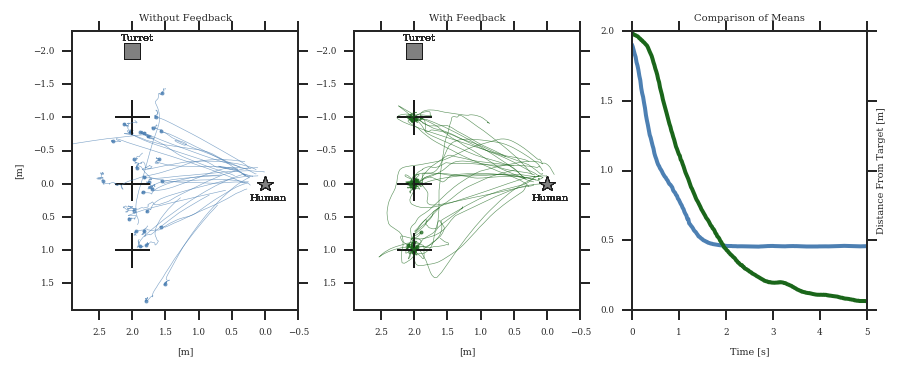

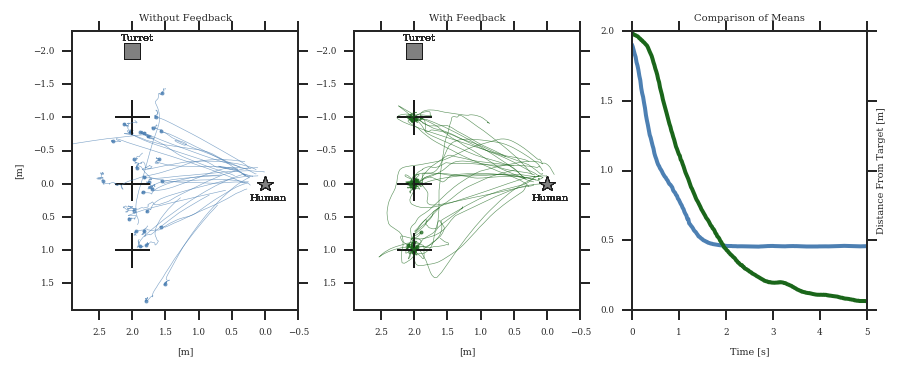

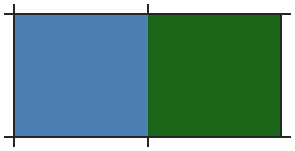

In [45]:
#Draw trajectories and mean d over time
setstyle("white")
fig,axs=plt.subplots(ncols= 3, figsize=(10,30))
mode_colors=[(0.3,0.5,0.7),(0.1,0.4,0.1)]
sns.palplot(mode_colors)
colormap={"without_feedback":mode_colors[0],"with_feedback":mode_colors[1]}



sns.set_context("paper", rc={"font.size":5,"axes.titlesize":5,"axes.labelsize":5})

def savefig(fig,fn,width_inches,height_inches):
    fig.set_size_inches(width_inches, height_inches)
    try:
        plt.tight_layout()
    except:
        pass
    fig.savefig("{}.png".format(fn),dpi=1000)
    fig.savefig("{}.pdf".format(fn))
    fig.savefig("{}.svg".format(fn))
    return fig
    
IEEE_2COL = 7.16 # IEEE \textwidth in inches
IEEE_1COL = 3.5 # IEEE \columnwidth in inches


targets = [{'x':2, 'y':-1},{'x':2, 'y':0}, {'x':2, 'y':1}]
t = [np.array([2, -1]), np.array([2, 0]), np.array([2, 1])]
x_axis = np.array(np.arange(0, 5, 5.0/250.0))
best_run = {'1':0, '2':2, '4':0, '5':0, '17':2, '6':0, '8':0, '10':0, '12':0, '13':2, '14':2, '16':2 }
#user 4 bad
#user 6 bad


def draw_session_separated(user, colormap, axs, nsessions=-1, best_index=0):
    for session in user[3*best_index:3*best_index+nsessions]:
        c = colormap["without_feedback"]
        x, y, z = zip(session['p_moving_no_fdb'])
        axs[0].plot(x[0],y[0],color=c,linewidth=0.3,alpha=0.7)
        draw_single_points(x[0], y[0], c, axs[0])
        x, y, z = zip(session['p_pointing_no_fdb']) 
        axs[0].plot(x[0],y[0],color=c,linewidth=0.3,alpha=0.7)
        
        c = colormap["with_feedback"]
        x, y, z = zip(session['p_moving_fdb'])  
        axs[1].plot(x[0],y[0],color=c,linewidth=0.3,alpha=0.7)
        draw_single_points(x[0], y[0], c, axs[1])

        x, y, z = zip(session['p_pointing_fdb'])            
        axs[1].plot(x[0],y[0],color=c,linewidth=0.3,alpha=0.7)


distances_no_fdb = []
distances_fdb = []


def draw_all_user(n):
    for i in range(0, n):
        for j in range(0, 2):
            axs[j].plot(0,0,color="gray",marker="*",markersize=8)
            axs[j].annotate("Human", (0.23, 0.25), size=5)
            axs[j].plot(2,-2 ,color="gray",marker="s",markersize=8)
            axs[j].annotate("Turret", (2.17, -2.15),size=5)
            axs[j].set_aspect("equal")
            axs[j].set_xlim(-0.5, 2.9)
            axs[j].set_ylim(-2.3, 1.9)
            axs[j].set_xlabel("[m]")
            if j==0:
                axs[j].set_ylabel("[m]")
                axs[j].set_title("Trajectories Without Feedback")
            else:
                axs[j].set_title("Trajectories With Feedback")
            axs[j].invert_xaxis()
            axs[j].invert_yaxis()
            for target in targets:
                makecross(target["x"],target["y"], axs[j])
        best_index = best_run[user_id[i]]
        draw_session_separated(axs=axs, colormap=colormap, user=users[i], nsessions=3, best_index = best_index)
        if user_id[i] != '17':
            for idx, target in enumerate(t):
                x, y, z = zip(users[i][idx+3*best_index]['p_moving_no_fdb'])
                p =np.column_stack((x[0], y[0]))
                dist = np.linalg.norm(target-p, axis=1)
                distances_no_fdb.append(dist[0:250])
                x, y, z = zip(users[i][idx]['p_moving_fdb'])
                p =np.column_stack((x[0], y[0]))
                dist = np.linalg.norm(target-p, axis=1)
                distances_fdb.append(dist[0:250])
        else:
            for idx, target in enumerate(t[1:]):
                x, y, z = zip(users[i][idx+3*best_index]['p_moving_no_fdb'])
                p =np.column_stack((x[0], y[0]))
                dist = np.linalg.norm(target-p, axis=1)
                distances_no_fdb.append(dist[0:250])
                x, y, z = zip(users[i][idx]['p_moving_fdb'])
                p =np.column_stack((x[0], y[0]))
                dist = np.linalg.norm(target-p, axis=1)
                distances_fdb.append(dist[0:250])
    mean_no_fdb = np.mean(distances_no_fdb, axis=0)
    c = colormap["without_feedback"]
    axs[2].plot(x_axis, mean_no_fdb, color=c,linewidth=2,alpha=1)
    axs[2].yaxis.set_label_position("right")
    axs[2].set_ylabel("Distance From Target [m]")
    axs[1].set_xlabel("[m]")
    axs[1].set_xlabel("[m]")
    axs[2].set_xlabel("Time [s]")
    mean_fdb = np.mean(distances_fdb, axis=0)
    c = colormap["with_feedback"]
    axs[2].plot(x_axis, mean_fdb, color=c,linewidth=2,alpha=1)
    #axs[i][2].set_aspect("equal")
    axs[2].set_xlim(0, 5)
    axs[2].set_ylim(0, 2.0)
    axs[0].set_title("Without Feedback" )
    axs[1].set_title("With Feedback" )
    axs[2].set_title("Comparison of Means" )
    #axs[i][idx].invert_xaxis()
    #axs[i][idx].invert_yaxis()

draw_all_user(n_user)



savefig(fig, "res_out/with_without_mean", height_inches=2.5, width_inches=IEEE_2COL)